<a href="https://colab.research.google.com/github/danielhladky/CAS_ADS/blob/master/BAG_TP_ML_DL_UniBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

## Predictive Inventory Management

### Authors: Daniel Hladky and Vadim Peshekhonov

Integrum Solution AG works on specific customer projects. Within this work the aim is to predict the inventory based on the historical consumption of data. The data has been already extracted and cleaned and are available in a CSV format. The aim is to get 2 years of historical data and to train two models (e.g. LSTM and GradientBoosting) that will give a simple view of the stock movement. The regression will be implemented in Keras or TensorFlow and Scikit-Learn.

Links to datasets you may use: Customer specific historical data as CSV The data will be kind of anonymous. Only UUID (individual stock within supply chain is shown withut customer name)

Date: 19 February 2019 (project presentation at UniBE)

## Module 3 - UniBE - CAS Applied Data Science
For the module 3 we have elaborated on various aspects and created different notebooks within Colab or jupyter notebooks. 

### Part I   -  Data Analysis, XGB, Lasso, Ridge(Time_series_analysis_TP_UniBE.ipynb)
### Part II  -  TensorFlow (TF) LSTM  (BAG_TP_ML_DL_UniBE.ipynb)
### Part III -  TF single hidden layer (TP_single_hidden_layer_network_ipynb.ipynb)
### Part IV -  TF FullyConnected_MultiLayer(multiple_layer_network_TP_UniBE.ipynb)

In [0]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 5px;
    color: #0000aa;
    background-color: #cccccc;
} </style>""")

In [0]:
# use this code cell when reading the file from jupyther notebook
# df = pd.read_csv('Thermoplan_Mean_Agg_pushed.csv')

In [0]:
# use this code cell to mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# use next line to display the files if needed
#!ls "/content/drive/My Drive"

In [0]:
# read the file from google drive 
TP = '/content/drive/My Drive/Datasets_ML/Thermoplan_Mean_Agg_pushed.csv'
df = pd.read_csv(TP)

In [0]:
df.head()

,Datum,8C5BBAAB7A213D69885122F2BF3E986C,8007D27994553DE180ED809F7B3F32CF,89B81AC901F932769400194890DDBA8F,59A9E02EC2723E87BAE018C58CF08904,08775DFA79D834CEAD88D7EF63185D94,CAC59BCDBE86370D840726487D717367,4F7480C5D69C3247843827DAD299858F,144E15B433E73E5A8B91D5CBE9C8144E,A6E0581580CA324DAF9EB83633973AAD,...,BW3CTS,BW4cCTM,BW4CTM,BWoneCTM,CEM200,CH,CHT,RF3,Tiger,TS3
0,2016-09-01,2430.0,11250.0,782.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,0,8,0,0,20,0,0,0,0,0
1,2016-09-02,2430.0,11300.0,794.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,1,14,0,0,20,1,0,0,0,0
2,2016-09-03,2430.0,11300.0,794.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,1,14,0,0,20,1,0,0,0,0
3,2016-09-04,2430.0,11300.0,797.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,1,14,0,0,20,1,0,0,0,0
4,2016-09-05,2430.0,11300.0,797.0,69.0,18298.0,13374.0,399.0,767.0,189.0,...,1,23,0,0,20,1,0,0,0,0


In [0]:
df.shape

(487, 768)

In [0]:
# check how many UUID's are within the dataframe. All UUID's have length 32
#print(df.columns.values)
newcollist= list()
for a in df.columns.values:
    if len(a)==32:
        newcollist.append(a)
newdf = df.filter(items=newcollist)

print(newdf.shape)

(487, 682)


In [0]:
# check the different datatypes
# df.dtypes

**Data Analysis**
Besides classical dataframe analysis some in-depth analysis can be useful to understand the data and correlation. Problem is the dimension of the dataframe (over 400 variables)

In [0]:
# do some quick analysis using pandas profile
# !pip show pandas-profiling
#import pandas_profiling -provides a hugh list-report
#pandas_profiling.ProfileReport(df)

Next cell for correlation analysis takes a long time to execute

In [0]:
import seaborn as sns

plt.figure(figsize=(200,200)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(df.corr())

In [0]:
# correlation analysis with many variables
# https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3

Adapt the dataframe by converting the date (datum)

In [0]:
# convert data which is type object into datetime
df['Datum'] = pd.to_datetime(df['Datum'])
df.head()

,Datum,8C5BBAAB7A213D69885122F2BF3E986C,8007D27994553DE180ED809F7B3F32CF,89B81AC901F932769400194890DDBA8F,59A9E02EC2723E87BAE018C58CF08904,08775DFA79D834CEAD88D7EF63185D94,CAC59BCDBE86370D840726487D717367,4F7480C5D69C3247843827DAD299858F,144E15B433E73E5A8B91D5CBE9C8144E,A6E0581580CA324DAF9EB83633973AAD,...,BW3CTS,BW4cCTM,BW4CTM,BWoneCTM,CEM200,CH,CHT,RF3,Tiger,TS3
0,2016-09-01,2430.0,11250.0,782.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,0,8,0,0,20,0,0,0,0,0
1,2016-09-02,2430.0,11300.0,794.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,1,14,0,0,20,1,0,0,0,0
2,2016-09-03,2430.0,11300.0,794.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,1,14,0,0,20,1,0,0,0,0
3,2016-09-04,2430.0,11300.0,797.0,69.0,18298.0,13374.0,352.0,767.0,131.0,...,1,14,0,0,20,1,0,0,0,0
4,2016-09-05,2430.0,11300.0,797.0,69.0,18298.0,13374.0,399.0,767.0,189.0,...,1,23,0,0,20,1,0,0,0,0


In [0]:
# UUID format, e.g. 8C5BBAAB7A213D69885122F2BF3E986C = has length 32
# UUID: 026CBAE094394E01A29914AF256DD413
# UUID: CAC59BCDBE86370D840726487D717367
# for each UUID create a regression model
# how many columns with UUID

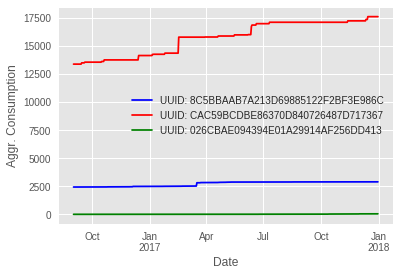

In [0]:
# plot for a specific UUID the history
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.gca()
df.plot(kind='line',x='Datum',y='8C5BBAAB7A213D69885122F2BF3E986C', color='blue',ax=ax, label='UUID: 8C5BBAAB7A213D69885122F2BF3E986C')
df.plot(kind='line',x='Datum',y='CAC59BCDBE86370D840726487D717367', color='red', ax=ax, label='UUID: CAC59BCDBE86370D840726487D717367')
df.plot(kind='line',x='Datum',y='026CBAE094394E01A29914AF256DD413', color='green', ax=ax, label='UUID: 026CBAE094394E01A29914AF256DD413')
plt.xlabel("Date")
plt.ylabel("Aggr. Consumption")
plt.legend()
plt.show()

# Data Analysis, Mvg Average, Lasso, Ridge, XGB
Check notebook:
## time_series_analysis_thermoplan.ipynb

Load the various machine leanring libraries from scikit learn and XGBoost

Check the dataframe about size and find the iloc location of the specific UUID that will become the y label for prediction

In [0]:
print('dictionary keys: ',df.keys())
#print('Description: ',df.describe())

dictionary keys:  Index(['Datum', '8C5BBAAB7A213D69885122F2BF3E986C',
       '8007D27994553DE180ED809F7B3F32CF', '89B81AC901F932769400194890DDBA8F',
       '59A9E02EC2723E87BAE018C58CF08904', '08775DFA79D834CEAD88D7EF63185D94',
       'CAC59BCDBE86370D840726487D717367', '4F7480C5D69C3247843827DAD299858F',
       '144E15B433E73E5A8B91D5CBE9C8144E', 'A6E0581580CA324DAF9EB83633973AAD',
       ...
       'BW3CTS', 'BW4cCTM', 'BW4CTM', 'BWoneCTM', 'CEM200', 'CH', 'CHT', 'RF3',
       'Tiger', 'TS3'],
      dtype='object', length=768)
Description:         8C5BBAAB7A213D69885122F2BF3E986C  8007D27994553DE180ED809F7B3F32CF  \
count                        487.000000                        487.000000   
mean                        2710.227926                      18977.002053   
std                          200.089464                       4725.201113   
min                         2430.000000                      11250.000000   
25%                         2483.000000                      14550

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Columns: 768 entries, Datum to TS3
dtypes: datetime64[ns](1), float64(682), int64(85)
memory usage: 2.9 MB


In [0]:
# simple tutorial on how to slide out a column and add it at the end of the dataframe
#dfxx = pd.DataFrame({'Col1': [10, 20, 15, 30, 45],'Col2': [13, 23, 18, 33, 48],'Col3': [17, 27, 22, 37, 52]})
#dfxx
#dfyy = dfxx.pop('Col2')
#dfxx['Col2'] = dfyy
#dfxx

In [0]:
# Prepapre dataset for training and test, select one specific UUID
# cut the selected UUID and add it to the end of the dataframe
#uuid = '026CBAE094394E01A29914AF256DD413'
#uuid = 'CAC59BCDBE86370D840726487D717367'
uuid = '8C5BBAAB7A213D69885122F2BF3E986C'


# cut the column of the uuid and add to the end as y label for prediction
df1 = df.pop(uuid)
df[uuid] = df1
#df

# split the dataframe into X and y by removing the last column
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [0]:
# add TensorFlow for LSTM and analyse just one column without any variables influencing
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [0]:
# select the data to use, meaning column of the UUID that you like to predict
# '8C5BBAAB7A213D69885122F2BF3E986C', 'CAC59BCDBE86370D840726487D717367', '026CBAE094394E01A29914AF256DD413'
data_to_use = df['8C5BBAAB7A213D69885122F2BF3E986C'].values

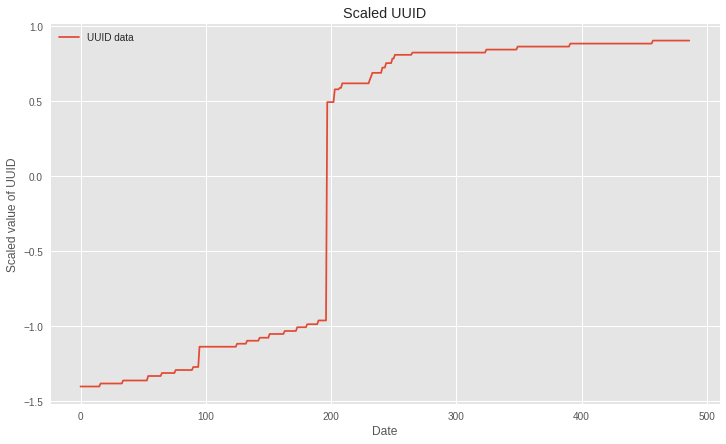

In [0]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))
# plot the scled data of the selected UUID
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled UUID')
plt.xlabel('Date')
plt.ylabel('Scaled value of UUID')
plt.plot(scaled_data, label='UUID data')
plt.legend()
plt.show()

In [0]:
def window_data(data, window_size):
    '''
    This function is used to create Features and Labels datasets. By windowing the data.
    
    Input: data - dataset used in the project
           window_size - how many data points we are going to use to predict the next datapoint in the sequence 
                       [Example: if window_size = 1 we are going to use only the previous day to predict todays stock prices]
    
    Outputs: X - features splitted into windows of datapoints (if window_size = 1, X = [len(data)-1, 1])
             y - 'labels', actually this is the next number in the sequence, this number we are trying to predict
    '''
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [0]:
X, y = window_data(scaled_data, 7)

In [0]:
# split the dataset - currently manual 
X_train  = np.array(X[:431])
y_train = np.array(y[:431])

X_test = np.array(X[431:])
y_test = np.array(y[431:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (431, 7, 1)
y_train size: (431, 1)
X_test size: (49, 7, 1)
y_test size: (49, 1)


In [0]:
# Define network
#Hyperparameters used in the network
batch_size = 7 #how many windows of data we are passing at once
window_size = 7 #how big window_size is (Or How many days do we consider to predict next point in the sequence)
hidden_layer = 256 #How many units do we use in LSTM cell
clip_margin = 4 #To prevent exploding gradient, we use clipper to clip gradients below -margin or above this margin
learning_rate = 0.001 
epochs = 200 

In [0]:
inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1])
targets = tf.placeholder(tf.float32, [batch_size, 1])

In [0]:
# LSTM weights
#Weights for the input gate
weights_input_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_input_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_input = tf.Variable(tf.zeros([hidden_layer]))

#weights for the forgot gate
weights_forget_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_forget_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_forget = tf.Variable(tf.zeros([hidden_layer]))

#weights for the output gate
weights_output_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_output_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_output = tf.Variable(tf.zeros([hidden_layer]))

#weights for the memory cell
weights_memory_cell = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_memory_cell_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_memory_cell = tf.Variable(tf.zeros([hidden_layer]))

In [0]:
## Output layer weigts
weights_output = tf.Variable(tf.truncated_normal([hidden_layer, 1], stddev=0.05))
bias_output_layer = tf.Variable(tf.zeros([1]))

In [0]:
def LSTM_cell(input, output, state):
    
    input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
    
    forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
    
    output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
    
    memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
    
    state = state * forget_gate + input_gate * memory_cell
    
    output = output_gate * tf.tanh(state)
    return state, output

In [0]:
outputs = []
for i in range(batch_size): #Iterates through every window in the batch
    #for each batch I am creating batch_state as all zeros and output for that window which is all zeros at the beginning as well.
    batch_state = np.zeros([1, hidden_layer], dtype=np.float32) 
    batch_output = np.zeros([1, hidden_layer], dtype=np.float32)
    #for each point in the window we are feeding that into LSTM to get next output
    for ii in range(window_size):
        batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][ii], (-1, 1)), batch_state, batch_output)
    #last output is conisdered and used to get a prediction
    outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)

In [0]:
outputs

[<tf.Tensor 'add_511:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_575:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_639:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_703:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_767:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_831:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_895:0' shape=(1, 1) dtype=float32>]

In [0]:
losses = []

for i in range(len(outputs)):
    losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)), outputs[i]))
    
loss = tf.reduce_mean(losses)

In [0]:
gradients = tf.gradients(loss, tf.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
optimizer = tf.train.AdamOptimizer(learning_rate)
trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))

In [0]:
session = tf.Session()
session.run(tf.global_variables_initializer())

Train the LSTM model and print

In [0]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 20) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/200  Current loss: 0.25320160388946533
Epoch 20/200  Current loss: 0.05230063945055008
Epoch 40/200  Current loss: 0.03777216374874115
Epoch 60/200  Current loss: 0.02534766122698784
Epoch 80/200  Current loss: 0.01781642809510231
Epoch 100/200  Current loss: 0.017114466056227684
Epoch 120/200  Current loss: 0.007649669889360666
Epoch 140/200  Current loss: 0.010925457812845707
Epoch 160/200  Current loss: 0.00551336957141757
Epoch 180/200  Current loss: 0.005676825065165758


In [0]:
sup =[]
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j][0])

In [0]:
tests = []
i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([outputs], feed_dict={inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [0]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [0]:
# adapt to the window and number of rows....
test_results = []
for i in range(480):       # adapt the number, was 749
    if i >= 431:        # adapt the number, was 701
        test_results.append(tests_new[i-431])      # adapt the number
    else:
        test_results.append(None)

**Plotting the Predictions**

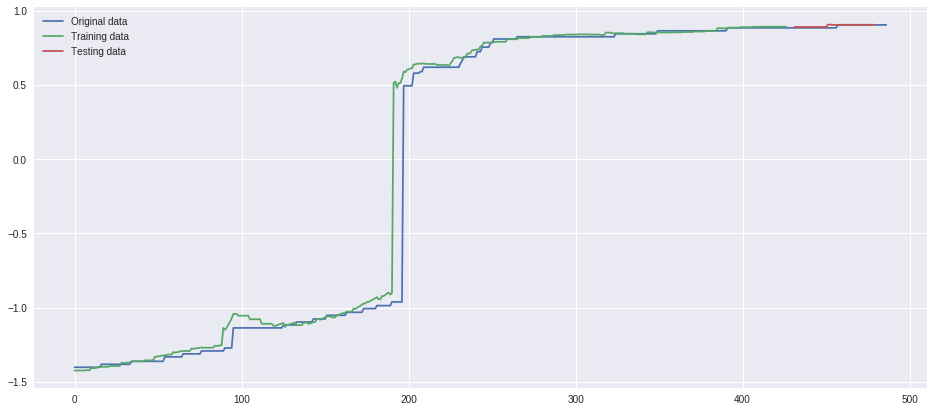

In [0]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_data, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()

In [0]:
# close the TF session
session.close()